###Aim
Study the behaviour of a string grammar . 

In [1]:
%matplotlib inline
import networkx as nx

In [2]:
from logging import getLogger 
from eden.util import configure_logging
configure_logging(getLogger(''),verbosity=1)

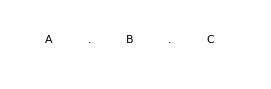

In [3]:
def getpathgraph(labels):
    nlabels= len(labels)
    G=nx.path_graph(nlabels)
    for e in range(nlabels):
        G.node[e]['label']=labels[e]
    for e in range(nlabels-1):
        G.edge[e][e+1]['label']='.'
    return G


G=getpathgraph("ABC")

from eden.util import display
display.draw_graph(G, size=4, node_size=1500, prog='circo', size_x_to_y_ratio=3, font_size=11)

g1 = G.copy()

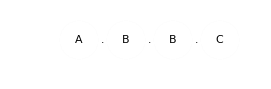

In [4]:
G=getpathgraph('ABBC')

from eden.util import display
display.draw_graph(G, size=4, node_size=1500, prog='circo', size_x_to_y_ratio=3, font_size=11)

g2 = G.copy()

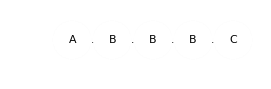

In [5]:
G=getpathgraph('ABBBC')

from eden.util import display
display.draw_graph(G, size=4, node_size=1500, prog='circo', size_x_to_y_ratio=3, font_size=11)

g3 = G.copy()

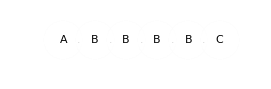

In [6]:
G=getpathgraph('ABBBBC')


from eden.util import display
display.draw_graph(G, size=4, node_size=1500, prog='circo', size_x_to_y_ratio=3, font_size=11)

g4 = G.copy()

In [7]:
%%time
import sys
sys.path.append('..')
import graphlearn.graphlearn as gl
from eden.converter.graph.gspan import gspan_to_eden
import itertools
gr = [g1,g2,g3,g4,g4]

sampler=gl.GraphLearnSampler(radius_list=[0,1],thickness_list=[2], complexity=2)
sampler.fit(gr,n_jobs=-1, core_interface_pair_remove_threshold=1, interface_remove_threshold=1)

CPU times: user 956 ms, sys: 304 ms, total: 1.26 s
Wall time: 4.98 s


interface: 401890


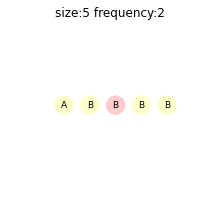

interface: 662886


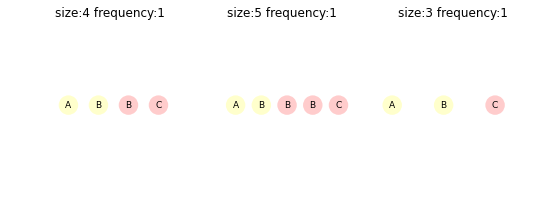

interface: 629289


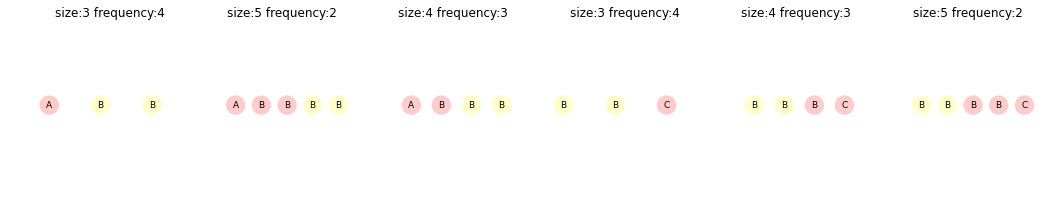

interface: 224428


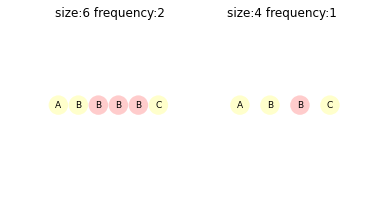

interface: 843837


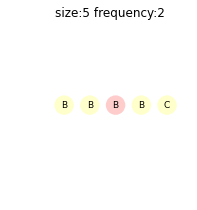

interface: 931919


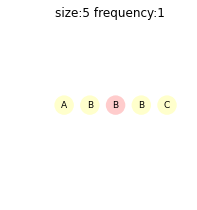

interface: 427197


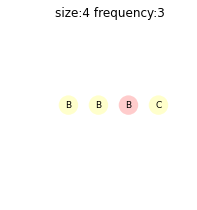

interface: 329401


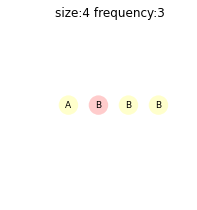

interface: 631003


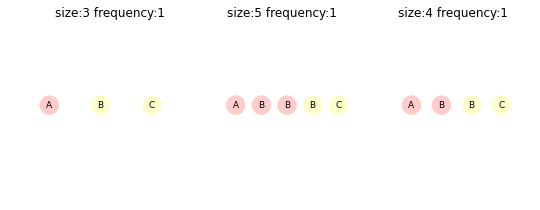

interface: 376477


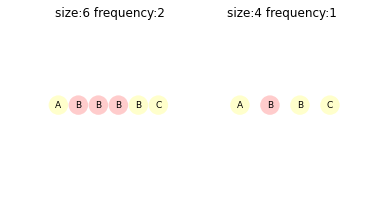

In [8]:
import graphlearn.utils.draw as draw
draw.draw_grammar(sampler.local_substitutable_graph_grammar.grammar,n_productions=None,
                     n_graphs_per_line=7, size=3, 
                     colormap='autumn', invert_colormap=True,
                     vertex_alpha=0.2, edge_alpha=0.2, node_size=380,
                     prog='circo', size_x_to_y_ratio=3)

how often do we see interfacehashes
# productions: 21
x = # interfaces (total: 10)
y=numberofcores(ihash), y=sumOfCoreCounts(ihash)


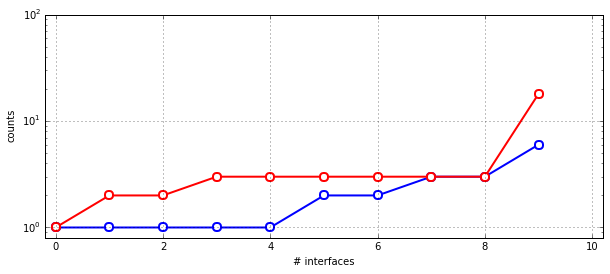

how often was this corehash seen?
x = # cores (total: 8)
y = inYinterfaces(chash), y= sumOfCountOverAllInterfaces(chash)


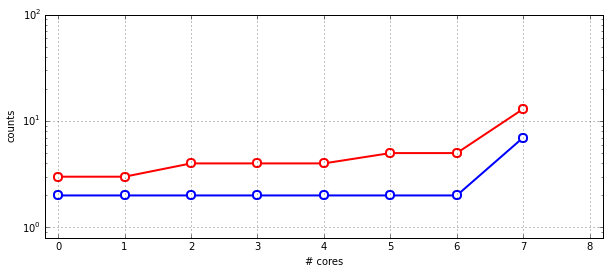

histogram
# productions: 21
distinct cores: 8 (seen on x axis)
interfaces with x many cores were observed y many times. 


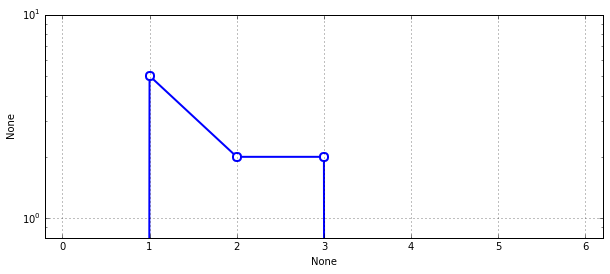

other histogram
how many cores exist with x many interfaces


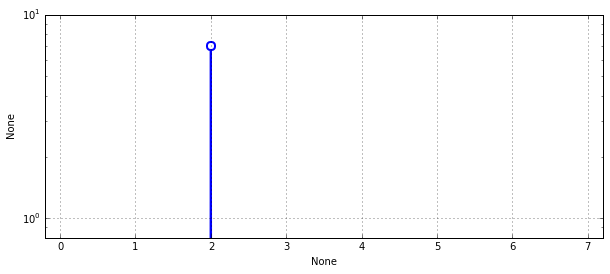

In [9]:
draw.draw_grammar_stats(sampler.local_substitutable_graph_grammar.grammar)

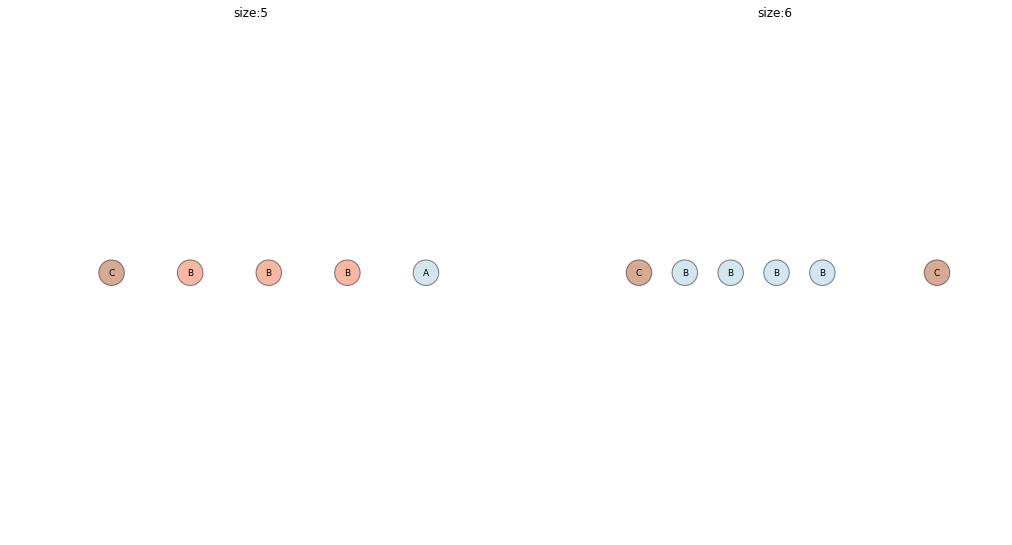

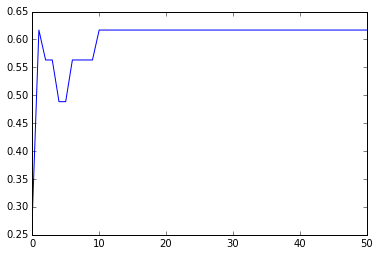

In [10]:
#sample
seed_graphs = [g1]
n_steps=50
graphs = sampler.sample(seed_graphs,
                        same_radius=False,
                        same_core_size=False,
                        n_samples=10,
                        batch_size=1,
                        n_steps=n_steps,
                        n_jobs=-1,
                        accept_annealing_factor=1.3)
#draw
import matplotlib.pyplot as plt
scores=[]
for graph in list(graphs):
    scores.append(graph.graph['sampling_info']['score_history'])
    path_graphs = graph.graph['sampling_info']['graphs_history']
    draw.draw_graph_set(path_graphs,
                           n_graphs_per_line=4, size=9,
                           prog='circo',
                           colormap='Paired', invert_colormap=False,node_border=0.5, vertex_color='_labels_',
                           vertex_alpha=0.5, edge_alpha=0.2, node_size=650)
    
for h in scores: plt.plot(h)
plt.show()

##Note:
given that the string with more occurrences of 'b' is more frequent, then the tendency is to move towards a larger number of bs.

Note that if we keep on increasing the number of copies of one instance this becomes so popular that both the 50% least dense and the 50% more dense will contain the same number of instances and hence the direction of the signal will vanish.  

preprocessing grammar
_sample_notes: None
accept_annealing_factor: 0
accept_static_penalty: 1
batch_size: 10
   burnout: 0
complexity: 3
estimatorobject: <graphlearn.estimator.estimator instance at 0x7fb9cb31edd0>
feasibility_checker: <graphlearn.feasibility.FeasibilityChecker instance at 0x7fb9caa89b00>
generatormode: False
hash_bitmask: 1048575
keep_duplicates: False
local_substitutable_graph_grammar: <graphlearn.localsubstitutablegraphgrammar.LocalSubstitutableGraphGrammar instance at 0x7fba0637b758>
    n_jobs: 1
   n_steps: 200
      nbit: 20
node_entity_check: <function <lambda> at 0x7fb9cb327c08>
postprocessor: <graphlearn.postprocessing.PostProcessor instance at 0x7fb9ca6ba5a8>
probabilistic_core_choice: False
radius_list: [0, 2, 4]
same_core_size: False
same_radius: False
sample_path: None
sampling_interval: 21
select_cip_max_tries: 100
similarity: -1
      step: None
thickness_list: [2]
vectorizer: graph.Vectorizer( r = 3, d = 3, min_r = 0, min_d = 0, nbits = 10, normalizatio

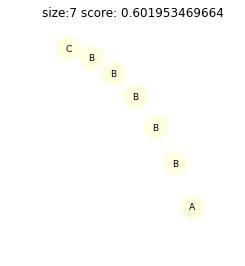

iteration:0
select_cip_for_substitution failed because no suiting interface was found, extract failed 100 times; cip found but unacceptable:100 
Traceback (most recent call last):
  File "../graphlearn/graphlearn.py", line 226, in _sample
    candidate_graph = self._propose(graph)
  File "../graphlearn/graphlearn.py", line 363, in _propose
    graph = self._propose_graph(graph)
  File "../graphlearn/graphlearn.py", line 376, in _propose_graph
    original_cip = self.select_original_cip(graph)
  File "../graphlearn/graphlearn.py", line 503, in select_original_cip
    ( failcount+nocip,failcount))
Exception: select_cip_for_substitution failed because no suiting interface was found, extract failed 100 times; cip found but unacceptable:100 

1 


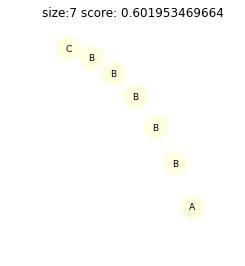

iteration:0
select_cip_for_substitution failed because no suiting interface was found, extract failed 100 times; cip found but unacceptable:100 
Traceback (most recent call last):
  File "../graphlearn/graphlearn.py", line 226, in _sample
    candidate_graph = self._propose(graph)
  File "../graphlearn/graphlearn.py", line 363, in _propose
    graph = self._propose_graph(graph)
  File "../graphlearn/graphlearn.py", line 376, in _propose_graph
    original_cip = self.select_original_cip(graph)
  File "../graphlearn/graphlearn.py", line 503, in select_original_cip
    ( failcount+nocip,failcount))
Exception: select_cip_for_substitution failed because no suiting interface was found, extract failed 100 times; cip found but unacceptable:100 

2 


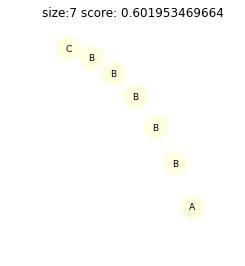

iteration:0
select_cip_for_substitution failed because no suiting interface was found, extract failed 100 times; cip found but unacceptable:100 
Traceback (most recent call last):
  File "../graphlearn/graphlearn.py", line 226, in _sample
    candidate_graph = self._propose(graph)
  File "../graphlearn/graphlearn.py", line 363, in _propose
    graph = self._propose_graph(graph)
  File "../graphlearn/graphlearn.py", line 376, in _propose_graph
    original_cip = self.select_original_cip(graph)
  File "../graphlearn/graphlearn.py", line 503, in select_original_cip
    ( failcount+nocip,failcount))
Exception: select_cip_for_substitution failed because no suiting interface was found, extract failed 100 times; cip found but unacceptable:100 

3 


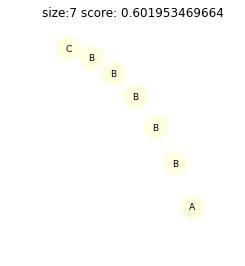

iteration:0
select_cip_for_substitution failed because no suiting interface was found, extract failed 100 times; cip found but unacceptable:100 
Traceback (most recent call last):
  File "../graphlearn/graphlearn.py", line 226, in _sample
    candidate_graph = self._propose(graph)
  File "../graphlearn/graphlearn.py", line 363, in _propose
    graph = self._propose_graph(graph)
  File "../graphlearn/graphlearn.py", line 376, in _propose_graph
    original_cip = self.select_original_cip(graph)
  File "../graphlearn/graphlearn.py", line 503, in select_original_cip
    ( failcount+nocip,failcount))
Exception: select_cip_for_substitution failed because no suiting interface was found, extract failed 100 times; cip found but unacceptable:100 

4 


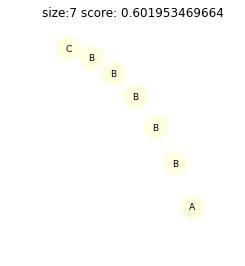

iteration:0
select_cip_for_substitution failed because no suiting interface was found, extract failed 100 times; cip found but unacceptable:100 
Traceback (most recent call last):
  File "../graphlearn/graphlearn.py", line 226, in _sample
    candidate_graph = self._propose(graph)
  File "../graphlearn/graphlearn.py", line 363, in _propose
    graph = self._propose_graph(graph)
  File "../graphlearn/graphlearn.py", line 376, in _propose_graph
    original_cip = self.select_original_cip(graph)
  File "../graphlearn/graphlearn.py", line 503, in select_original_cip
    ( failcount+nocip,failcount))
Exception: select_cip_for_substitution failed because no suiting interface was found, extract failed 100 times; cip found but unacceptable:100 

5 


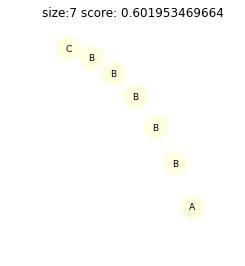

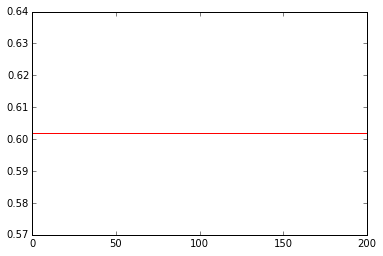

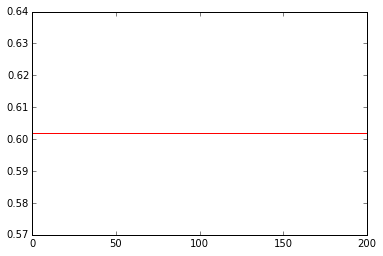

[[ 0.          0.23458747  0.         ...,  0.0050823   0.          0.00490855]]


In [53]:
import sys
sys.path.append('..')
import os
os.nice(19)
%matplotlib inline

import graphlearn.utils.draw as myutils
import graphlearn.directedsampler as ds
from eden.converter.graph.gspan import gspan_to_eden
import itertools
import matplotlib.pyplot as plt
import eden.graph as eg

steps=200
from logging import getLogger 
from eden.util import configure_logging
configure_logging(getLogger(''),verbosity=2)

#eg.Vectorizer(  normalization=False, inner_normalization=False, )

# so why do we fail if we use 10 here? 
vect=eg.Vectorizer( nbits= 10)


sampler= ds.directedSampler(thickness_list=[1],radius_list=[0,1,2], vectorizer=vect)


g1=getpathgraph('ABBBBBC')
food=[g1,g1,g1,g1,g1,g1]
target=getpathgraph('ABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBC')
target2=getpathgraph('ABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBC')
sampler.fit(food, n_jobs=1)


import scipy

graphs = sampler.sample(food,
                        #target_graph=target,
                        target_vector=   scipy.sparse.csr_matrix( sampler.get_average_vector([g1,target,target2])),
                        n_samples = 10,                   
                        n_steps=steps,
                        n_jobs=1,
                        select_cip_max_tries = 100,
                        same_core_size=False,
                        accept_annealing_factor=0,
                        accept_static_penalty= 1,
                        generatormode=False,
                        keep_duplicates=False,
                        probabilistic_core_choice=False
                        )


history=[]
for  i, gr in enumerate(graphs):
    print i,gr
    history.append(gr.graph['sampling_info']['score_history'])
    myutils.draw_graph_set_graphlearn(gr.graph['sampling_info']['graphs_history'],headlinehook=myutils.get_score_of_graph)
    

    
t = range(steps+1) 
for h in history[:3]:
    plt.plot(t, h)
plt.show()
t = range(steps+1) 
for h in history[3:6]:
    plt.plot(t, h)
plt.show()





print sampler.get_average_vector([g1,target,target2])

In [48]:
import numpy as np
a =  np.random.rand(3,5)
print a
print a.mean(axis=0)

[[ 0.45164989  0.71343016  0.44344727  0.59899623  0.64329195]
 [ 0.30662769  0.805251    0.85962944  0.94166944  0.69593563]
 [ 0.93080331  0.65584444  0.44492834  0.78370927  0.22313327]]
[ 0.56302696  0.72484187  0.58266835  0.77479165  0.52078695]


In [49]:
z= sampler.get_average_vector([g1,target,target2])

z=sampler.vectorizer.transform_single(g1)
z.indices

array([  25369,  178996,  334385,  361556,  448854,  449424,  485365,
        506444,  542453,  542455,  619493,  741457,  741459,  927281,
       1014477, 1022611], dtype=int32)

In [50]:
z= sampler.get_average_vector([g1,target,target2])
import scipy
a = scipy.sparse.csr_matrix(z)
a.indices

array([  25369,  178996,  334385,  361556,  448854,  449424,  485365,
        506444,  542453,  542455,  619493,  741457,  741459,  927281,
       1014477, 1022611], dtype=int32)

In [42]:
print z.nnz

AttributeError: 'matrix' object has no attribute 'nnz'